# Imbalanced Sample

In [1]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Load Data**
---

The [dataset](https://data.mendeley.com/datasets/x8ygrw87jw/1) comes from a study to predict a cerebrovascular stroke accident (CVA) or `stroke`, a binary response variable.
- `stroke`
  - `stroke = 0` for CVA didn't happen.
  - `stroke = 1` for CVA happened.

The potential predictors for the response variable are:
1. `gender`
2. `age`
3. `hypertension`
4. `heart_disease`
5. `ever_married`
6. `work_type`
7. `Residence_type`
8. `avg_glucose_level`
9. `bmi`
10. `smoking_status`

In [4]:
# Import dataset from csv file
data = pd.read_csv('../data/stroke.csv')

# Table check
data.head().T

,0,1,2,3,4
id,30669,30468,16523,56543,46136
gender,Male,Male,Female,Female,Male
age,3.0,58.0,8.0,70.0,14.0
hypertension,0,1,0,0,0
heart_disease,0,0,0,0,0
ever_married,No,Yes,No,Yes,No
work_type,children,Private,Private,Private,Never_worked
Residence_type,Rural,Urban,Urban,Rural,Rural
avg_glucose_level,95.12,87.96,110.89,69.04,161.28
bmi,18.0,39.2,17.6,35.9,19.1


In [5]:
# Check the data shape
data.shape

(43400, 12)

  - Our sample contains 12 variables from 43,400 observations.
    - 1 response variable, `stroke`,
    - 1 column `ID`,
    - and 10 potential predictors.

Check for the duplicate respondents in our sample using column `id`.

In [6]:
# Find the sum/total of duplicated respondents' IDs.
data['id'].duplicated().sum()

0

In [7]:
# Drop column ID
data = data.drop(columns=['id'], axis=1)

# Information check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


Check the proportion of response variable first to decide the splitting strategy.

In [8]:
# Define response variable
response_variable = 'stroke'

# Check the proportion of response variable
data[response_variable].value_counts(normalize=True)

stroke
0    0.981959
1    0.018041
Name: proportion, dtype: float64

The proportion of the response variable, `stroke`, is highly imbalanced (in a ratio of 98:2).

After EDA, we will preprocess the sample into:
1. The original training set
2. Training set with undersampling
3. Training set with oversampling

## **2. Sample Splitting**
---

First, define the predictors (X) and the response (y).

In [9]:
# Split response and predictors
y = data[response_variable]
X = data.drop(columns=[response_variable], axis=1)

# Validate the splitting
print('y shape :', y.shape)
print('X shape :', X.shape)

y shape : (43400,)
X shape : (43400, 10)


Next, split the training and testing set from each predictors (X) and response (y).
- Set `stratify = y` for splitting the sample with stratify, based on the proportion of response y.
- Set `test_size = 0.3` for holding 30% of the sample as a testing set.
- Set `random_state = 42` for reproducibility.

In [10]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 42)

# Validate splitting
print('X train shape :', X_train.shape)
print('y train shape :', y_train.shape)
print('X test shape  :', X_test.shape)
print('y test shape  :', y_test.shape)

X train shape : (30380, 10)
y train shape : (30380,)
X test shape  : (13020, 10)
y test shape  : (13020,)


Check the proportion of response y in each training and testing set.

In [11]:
y_train.value_counts(normalize=True)

stroke
0    0.981962
1    0.018038
Name: proportion, dtype: float64

In [12]:
y_test.value_counts(normalize=True)

stroke
0    0.981951
1    0.018049
Name: proportion, dtype: float64

## **3. Exploratory Data Analysis**
---

- To make a model that predicts well on unseen data, we must prevent leakage of test set information.
- Thus, we only explore on **training set**.

In [13]:
# Concatenate X_train and y_train as data_train
data_train = pd.concat((X_train, y_train), axis=1)

# Validate data_train
print('Train data shape:', data_train.shape)
data_train.head().T

Train data shape: (30380, 11)


,5473,26630,17083,4730,19154
gender,Male,Female,Male,Male,Female
age,7.0,53.0,26.0,7.0,44.0
hypertension,0,0,0,0,0
heart_disease,0,1,0,0,0
ever_married,No,No,No,No,Yes
work_type,children,Private,Private,children,Private
Residence_type,Rural,Urban,Rural,Urban,Urban
avg_glucose_level,102.78,94.68,88.28,77.12,84.55
bmi,18.1,NaN,36.3,18.6,44.5
smoking_status,NaN,never smoked,never smoked,NaN,NaN


What do we do in EDA?
- Check for any insight in the data:
  - Distribution or proportion
  - Outliers
  - Sparse data
  - Perfect discrimination
- Make a plan for data pre-processing.

In [14]:
# Check for missing values
data_train.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   995
smoking_status       9332
stroke                  0
dtype: int64

In [15]:
# Check for data type
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30380 entries, 5473 to 21868
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             30380 non-null  object 
 1   age                30380 non-null  float64
 2   hypertension       30380 non-null  int64  
 3   heart_disease      30380 non-null  int64  
 4   ever_married       30380 non-null  object 
 5   work_type          30380 non-null  object 
 6   Residence_type     30380 non-null  object 
 7   avg_glucose_level  30380 non-null  float64
 8   bmi                29385 non-null  float64
 9   smoking_status     21048 non-null  object 
 10  stroke             30380 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 2.8+ MB


**Summary**
- There are big number of missing values in `smoking_status` and small number of missing value in `bmi`.
  - `smoking_status` is categorical variable.
  - `bmi` is float variable.
- We need to find how to handle the missing values by exploring those variables.

### Predictor 1: gender

---
Gender of the respondent: male or female.

In [16]:
# Describe proportion of 'gender'
data_train['gender'].value_counts(normalize = True)

gender
Female    0.590520
Male      0.409151
Other     0.000329
Name: proportion, dtype: float64

From here, we know:
- We have gender of 'Other' in our sample.
  - Since we can't explain the dataset well, we will drop about 0.02% sample with gender of 'Other'
- Gender (female and male) of our sample is quite balanced, in a ratio of 59:41.

In [17]:
# Remove gender 'Other' from sample
data_train.drop(data_train[(data_train['gender'] == 'Other')].index,
                inplace = True)

<Axes: xlabel='gender', ylabel='count'>

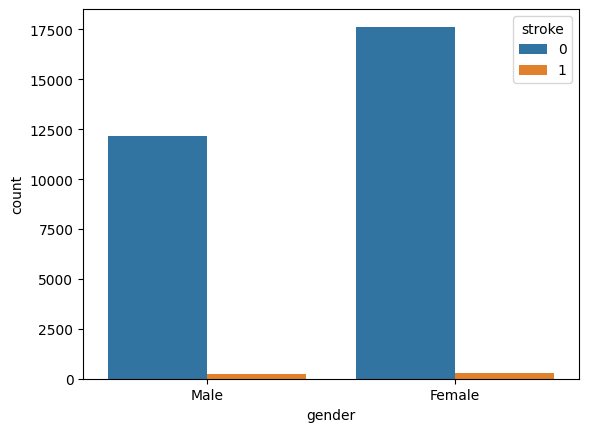

In [18]:
# Describe proportion of stroke by gender
sns.countplot(data = data_train,
              x = 'gender',
              hue = response_variable)

In [19]:
def calculate_odds(data, predictor_label):
  # Frequency of default by predictor_label
  crosstab = pd.crosstab(data[predictor_label],
                         data[response_variable],
                         margins = False)

  # Calculate odds
  crosstab['Odds'] = np.round((crosstab[1]/crosstab[0]),3)

  # Sort by the odds value
  crosstab = crosstab.sort_values(by = 'Odds',
                       ascending = False)

  return crosstab

In [20]:
# Calculate odds of default from predictor 'person_home_ownership'
odds_gender = calculate_odds(data = data_train,
                             predictor_label = 'gender')

odds_gender

stroke,0,1,Odds
gender,,,
Male,12184,246,0.020
Female,17638,302,0.017


Create a function to perform test of independence.

In [22]:
# Import the package
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Create a function of independence test
def independence_test(data, predictor_label, alpha=0.05):
    """
    Function to perform the independence test.

    Parameters
    ----------
    data : array like
      The data label.

    predictor_label : object
      The label of predictor variable.

    alpha : float in range[0,1], default = 0.05
      Probability of Type I Error (reject H0 when H0 is true).

    """
    # Build the contingency table
    crosstab = pd.crosstab(data[predictor_label],
                           data[response_variable],
                           margins = False)

    # Test whether churn is independent of the predictor
    stats.chi2_contingency(crosstab)

    # Result of independence test
    result = stats.chi2_contingency(crosstab)

    # Extract the test result
    stat = result[0]
    pval = result[1]

    # Print the conclusion
    if pval < alpha:
        print(f"Stroke and {predictor_label} is not independent with P-val={pval:.2f}.")
    else:
        print(f"Stroke and {predictor_label} is independent with P-val={pval:.2f}.")

In [23]:
# Perform the independence test
independence_test(data = data_train,
                  predictor_label = 'gender',
                  alpha = 0.05)

Stroke and gender is independent with P-val=0.06.


**Summary**
- Gender of 'Other' is removed from the sample.
- The probability of stroke and gender is not independent.

**Pre-processing Plan:**
- We don't have empty cells and missing values from `gender` variable.